## Preambule

In [58]:
import numpy as np
import xarray as xr
from importlib import reload
import pandas as pd
import plotly.express as px
from plotly.colors import n_colors
from matplotlib import colors as clrs
from plotly.subplots import make_subplots
import os
import plotly.figure_factory as ff
import matplotlib as mpl
import plotly.io
from pathlib import Path
import matplotlib.pyplot as plt
from datetime import date
import plotly.graph_objects as go
from Plotfunctions import triangleplot, tableplot, spaghettiplot, draw_line

## Parameters

In [59]:
save = 0                                # Save the figure or not

## Setup

In [60]:
cols = ['white', 'mediumseagreen', 'yellowgreen', 'dimgray', 'saddlebrown', 'rosybrown', 'darkred', 'tomato', 'gold', 'violet', 'skyblue', 'deeppink']

In [61]:
varvector = [
             ["Secondary Energy|Electricity|Coal+Gas|w/o CCS", "tomato"],
             ["Secondary Energy|Electricity|Coal|w/o CCS", "lightsalmon"],
             ["Secondary Energy|Electricity|Gas|w/o CCS", "lightsalmon"],

             ["Secondary Energy|Electricity|w/ CCS", "cornflowerblue"],
             ['Secondary Energy|Electricity|Coal|w/ CCS', 'dodgerblue'],
             ['Secondary Energy|Electricity|Gas|w/ CCS', 'dodgerblue'],
             ['Secondary Energy|Electricity|Biomass|w/ CCS', 'dodgerblue'],

             ["Secondary Energy|Electricity|Renewables (incl. Biomass)", "limegreen"],
             ["Secondary Energy|Electricity|Solar", "forestgreen"],
             ["Secondary Energy|Electricity|Wind", "forestgreen"],
             ["Secondary Energy|Electricity|Hydro", "forestgreen"],
             ["Secondary Energy|Electricity|Biomass|w/o CCS", "forestgreen"]
            ]
varvector = np.array(varvector)
cols = varvector[:, 1]
Variables = varvector[:, 0]
var_toplayer = ["Secondary Energy|Electricity|Coal+Gas|w/o CCS", "Secondary Energy|Electricity|w/ CCS", "Secondary Energy|Electricity|Renewables (incl. Biomass)"]

## Paths

In [62]:
current_dir = Path.cwd()
path_ipcc = Path("../../../Data/IPCC/") # Location of IPCC data
path_meta = path_ipcc / "AR6_Scenarios_Database_metadata_indicators_v1.1.xlsx"
path_data = current_dir / "../Data"
path_ar6 = path_ipcc / "AR6_Scenarios_Database_World_v1.1.csv"
path_modelconv = path_ipcc / "ModelConversion.xlsx"

## Prereading stuff

In [63]:
try:
    XRvar.close()
except:
    3
XRvar = xr.open_dataset(path_data / "Output_files" / "Variances.nc")
Varlist = pd.read_excel(path_data / "Input_files" / "Varlist.xlsx", sheet_name = "Data")
vars = np.array(Varlist["Variable"])
cats = np.array(Varlist["Category"])
Names = np.unique(cats)
XRraw = xr.open_dataset(path_data / "Handling_files" / "XRdata.nc")
XRmeta = xr.open_dataset(path_data / "Handling_files" / "XRmeta.nc")
XRdata = XRraw
DF = pd.read_csv(path_data / "Handling_files" / "Models.csv")
values = np.array(XRraw.Value)
modscens = np.array(XRraw.ModelScenario)
mods = np.array([i.split('|')[0] for i in modscens])
ccat = np.array(XRmeta.sel(ModelScenario=XRraw.ModelScenario).Category.data)
unimods = np.unique(mods)
uniccat = np.unique(ccat)
DF_counts = pd.read_csv(path_data / "Handling_files" / "Counts.csv", index_col=0)
XRvar = XRvar.sel(Time=range(2030,2101))
varlist = XRvar.Variable.data
years = XRvar.Time.data
years_str = np.copy(years).astype(str)
years_str[(years_str != '2050') & (years_str != '2100')] = ''

## Ternary traces

In [64]:
def rescale_size(s, max):
    s /= max
    s = s ** 1
    return s

In [65]:
def rgb_toint(col, alpha):
    nums = np.array(col[4:-1].split(',')).astype(float).astype(int)
    return "rgba("+str(nums[0])+','+str(nums[1])+','+str(nums[2])+','+str(alpha)+')'

General stuff

In [66]:
xrsub = XRvar.sel(Variable = Variables, Time = np.arange(2030, 2101, 1))
varmax = np.max(XRvar['CoefVar']).data
varlist = np.array(xrsub.Variable)
names = []
names2 = []
for v_i in range(len(varlist)):
        if varlist[v_i] == 'Secondary Energy|Electricity|Coal+Gas|w/o CCS':
                names.append('Fossil (without CCS)')
                names2.append('Fossil')
        elif varlist[v_i] == 'Secondary Energy|Electricity|w/ CCS':
                names.append('All CCS technologies')
                names2.append('All CCS')
        elif varlist[v_i] == 'Secondary Energy|Electricity|Renewables (incl. Biomass)':
                names.append('All renewables')
                names2.append('All renewables')
        elif varlist[v_i] == 'Secondary Energy|Electricity|Gas|w/ CCS':
                names.append('Gas (with CCS)')
                names2.append('Gas<br>(with CCS)<br><br><br>')
        elif varlist[v_i] == 'Secondary Energy|Electricity|Gas|w/o CCS':
                names.append('Gas (without CCS)')
                names2.append('Gas<br>(without CCS)<br><br><br>')
        elif varlist[v_i] == 'Secondary Energy|Electricity|Coal|w/o CCS':
                names.append('Coal (without CCS)')
                names2.append('<br><br><br>Coal<br>(without CCS)')
        elif varlist[v_i] == 'Secondary Energy|Electricity|Coal|w/ CCS':
                names.append('Coal (with CCS)')
                names2.append('<br><br><br><br><br>Coal<br>(with CCS)')
        elif varlist[v_i] == 'Secondary Energy|Electricity|Biomass|w/ CCS':
                names.append('Biomass (with CCS)')
                names2.append('<br><br><br>Biomass<br>(with CCS)')
        elif varlist[v_i] == 'Secondary Energy|Electricity|Biomass|w/o CCS':
                names.append('Biomass (without CCS)')
                names2.append('<br><br><br>Biomass<br>(without CCS)')
        elif varlist[v_i] == 'Secondary Energy|Electricity|Solar':
                names.append('Solar')
                names2.append('Solar<br><br>')
        elif varlist[v_i] == 'Secondary Energy|Electricity|Hydro':
                names.append('Hydro')
                names2.append('Hydro<br><br>')
        elif varlist[v_i] == 'Secondary Energy|Electricity|Wind':
                names.append('Wind')
                names2.append('<br><br><br><br>Wind')
        else:
                names.append(varlist[v_i][29:])
                names2.append(varlist[v_i][29:])
years = XRvar.Time.data

years_str = np.copy(years).astype(str)
years_str[(years_str != '2050') & (years_str != '2100')] = ''

In [67]:
linetraces = []
startraces = []
timeaxis = [2030, 2050, 2100]
scale = 100

In [68]:
# FULL LINES
for v in range(len(varlist)):
    try:
            count = list(DF_counts[DF_counts.Variable==varlist[v]].Count)[0]
    except:
            count = "-"
    ds = xrsub.sel(Variable=varlist[v], Time=[2030, 2050, 2100]) #np.arange(2030, 2101, 5))
    a, b, c, d, s = np.array(ds[['S_c', 'S_m', 'S_z', 'S_mc', 'CoefVar']].to_array())
    s = scale*rescale_size(s, varmax)
    rgb = mpl.colors.colorConverter.to_rgb(cols[v])
    colly='rgb('+str(rgb[0]*255)+','+str(rgb[1]*255)+','+str(rgb[2]*255)+')'
    colly_white = 'rgb('+str(rgb[0]*255*1.3)+','+str(rgb[1]*255*1.3)+','+str(rgb[2]*255*1.3)+')'
    colrow = n_colors('rgb(0,0,0)', colly, int(len(a)/2+2), colortype='rgb') + n_colors(colly, 'rgb(255, 255, 255)', int(len(a)/2+4), colortype='rgb')

    if varlist[v] not in var_toplayer:
        lw = 1
    elif varlist[v] in var_toplayer:
        lw = 6
    trace = go.Scatterternary(a=a+0.5*d, b=b+0.5*d, c=c,
                                mode='lines',
                                name=names[v],#+' ('+str(count)+')',
                                showlegend=False, #([False]*int(len(a)/2)+[True]+[False]*99)[i],
                                text=[2030, 2050, 2100], #np.arange(2030, 2101, 5),
                                hovertemplate='%{text}<br>Var (climate): %{a}<br>Var (model): %{b} <br>Var (other): %{c}',
                                line={'width': lw, #np.mean(s[i:i+2])*0.5,
                                        'color': cols[v]})
    linetraces.append(trace)

# MARKERS BOTLAYER
for v in range(len(varlist)):
    try:
            count = list(DF_counts[DF_counts.Variable==varlist[v]].Count)[0]
    except:
            count = "-"
    ds = xrsub.sel(Variable=varlist[v], Time=timeaxis)
    a, b, c, d, s = np.array(ds[['S_c', 'S_m', 'S_z', 'S_mc', 'CoefVar']].to_array())
    s = scale*rescale_size(s, varmax)
    rgb = mpl.colors.colorConverter.to_rgb(cols[v])
    colly='rgb('+str(rgb[0]*255)+','+str(rgb[1]*255)+','+str(rgb[2]*255)+')'
    colly_white = 'rgb('+str(rgb[0]*255*1.3)+','+str(rgb[1]*255*1.3)+','+str(rgb[2]*255*1.3)+')'
    colrow = n_colors('rgb(0,0,0)', colly, int(len(a)/2+2), colortype='rgb') + n_colors(colly, 'rgb(255, 255, 255)', int(len(a)/2+4), colortype='rgb')

    if varlist[v] not in var_toplayer:
        k=0
        for i in range(len(a)):
                cl1 = rgb_toint(colrow[i+2], 1)#0.9-i*0.03)
                cl = rgb_toint(colrow[i+2], 1)#1-i*0.03)
                if i == 0:
                        trace = go.Scatterternary(a=a[i:i+1]+0.5*d[i:i+1], b=b[i:i+1]+0.5*d[i:i+1], c=c[i:i+1],
                                                        mode='markers',
                                                        name=names[v],#+' ('+str(count)+')',
                                                        showlegend=False, #([False]*int(len(a)/2)+[True]+[False]*99)[i],
                                                        text=[[names2[v], ''], ['', ''], ['', '']][k],
                                                        hovertemplate='%{text}<br>Var (climate): %{a}<br>Var (model): %{b} <br>Var (other): %{c}',
                                                        marker={'size': [30/4, 0],#s[i:i+2]*0.45, !!!!!!!!!!!!!!!!! VARIANCE !!!!!!!!!!!!!!!!!!!!
                                                                'color': cols[v],#['black', cols[v], cols[v]][k],
                                                                'opacity': 1,#0.9-i*0.03,
                                                                'line' :dict(width=4, color='black'),
                                                                },
                                                        line={'width': 1, #np.mean(s[i:i+2])*0.5,
                                                                'color': cols[v]},
                                                        textfont=dict(size=10,
                                                                color=cols[v]))
                        linetraces.append(trace)
                trace = go.Scatterternary(a=a[i:i+2]+0.5*d[i:i+2], b=b[i:i+2]+0.5*d[i:i+2], c=c[i:i+2],
                                                mode='markers',
                                                name=names[v],#+' ('+str(count)+')',
                                                showlegend=False, #([False]*int(len(a)/2)+[True]+[False]*99)[i],
                                                text=[[names2[v], ''], ['', ''], ['', '']][k],
                                                hovertemplate='%{text}<br>Var (climate): %{a}<br>Var (model): %{b} <br>Var (other): %{c}',
                                                marker={'size': [30/4, 0],#s[i:i+2]*0.45, !!!!!!!!!!!!!!!!! VARIANCE !!!!!!!!!!!!!!!!!!!!
                                                        'color': cols[v],#['black', cols[v], cols[v]][k],
                                                        'opacity': 1,#0.9-i*0.03,
                                                        'line' :dict(width=0.3, color=[cl1, 'black', 'black']),
                                                        },
                                                line={'width': 1, #np.mean(s[i:i+2])*0.5,
                                                        'color': cols[v]},
                                                textfont=dict(size=10,
                                                        color=cols[v]))
                linetraces.append(trace)
                k+=1

sz = 36
# MARKERS TOPLAYER
for v in range(len(varlist)):
    try:
            count = list(DF_counts[DF_counts.Variable==varlist[v]].Count)[0]
    except:
            count = "-"
    ds = xrsub.sel(Variable=varlist[v], Time=timeaxis)
    a, b, c, d, s = np.array(ds[['S_c', 'S_m', 'S_z', 'S_mc', 'CoefVar']].to_array())
    s = scale*rescale_size(s, varmax)
    rgb = mpl.colors.colorConverter.to_rgb(cols[v])
    colly='rgb('+str(rgb[0]*255)+','+str(rgb[1]*255)+','+str(rgb[2]*255)+')'
    colly_white = 'rgb('+str(rgb[0]*255*1.3)+','+str(rgb[1]*255*1.3)+','+str(rgb[2]*255*1.3)+')'
    colrow = n_colors('rgb(0,0,0)', colly, int(len(a)/2+2), colortype='rgb') + n_colors(colly, 'rgb(255, 255, 255)', int(len(a)/2+4), colortype='rgb')

    if varlist[v] in var_toplayer:
        k=0
        for i in range(len(a)-1):
                cl1 = rgb_toint(colrow[i+2], 1)#0.9-i*0.03)
                cl = rgb_toint(colrow[i+2], 1)#1-i*0.03)
                trace = go.Scatterternary(a=a[i:i+2]+0.5*d[i:i+2], b=b[i:i+2]+0.5*d[i:i+2], c=c[i:i+2],
                                                mode='markers+text',
                                                name=names[v],#+' ('+str(count)+')',
                                                showlegend=False, #([False]*int(len(a)/2)+[True]+[False]*99)[i],
                                                text=[[timeaxis[i], ''], [timeaxis[i], timeaxis[i+1]]][k],
                                                hovertemplate='%{text}<br>Var (climate): %{a}<br>Var (model): %{b} <br>Var (other): %{c}',
                                                marker={'size': [[sz, 0], [sz, sz]][k],#s[i:i+2]*0.45, !!!!!!!!!!!!!!!!! VARIANCE !!!!!!!!!!!!!!!!!!!!
                                                        'color': cols[v],
                                                        'opacity': 1,#0.9-i*0.03,
                                                        'line' :dict(width=[[1, 1], [1, 1]][k], color="black")},
                                                line={'width': 6, #np.mean(s[i:i+2])*0.5,
                                                        'color': cols[v]},
                                                textfont=dict(size=11.5,
                                                        family='Arial Black',
                                                        color="black"))
                linetraces.append(trace)
                k+=1

## Boxplots

In [69]:
import Plotfunctions
reload(Plotfunctions)
from Plotfunctions import rescale_size, triangleplot, tableplot, spaghettiplot, draw_line, boxplots, drawline_brack, drawline_single

In [70]:
T1a = boxplots("Secondary Energy|Electricity|Coal|w/o CCS", 'tomato', 2050, XRdata, XRmeta, "cat",
              "Variance in electricity from <b>fossils</b> w/o CCS<br>clearly driven by climate outcome", "yes")
T1b = boxplots("Secondary Energy|Electricity|Gas|w/o CCS", 'tomato', 2050, XRdata, XRmeta, "cat",
              "Variance in electricity from <b>fossils</b> w/o CCS<br>clearly driven by climate outcome", "yes")

T2a = boxplots("Secondary Energy|Electricity|Biomass|w/ CCS", 'dodgerblue', 2050, XRdata, XRmeta, "cat",
              "Electricity from <b>BECCS</b> reaches high fraction of potential<br>in C4 already, reducing variance driven by climate", "yes")
T2b = boxplots("Secondary Energy|Electricity|Gas|w/ CCS", 'dodgerblue', 2050, XRdata, XRmeta, "cat",
              "Electricity from <b>BECCS</b> reaches high fraction of potential<br>in C4 already, reducing variance driven by climate", "yes")

T3a = boxplots("Secondary Energy|Electricity|Solar", 'forestgreen', 2050, XRdata, XRmeta, "model",
              "Electricity from <b>BECCS</b> reaches high fraction of potential<br>in C4 already, reducing variance driven by climate", "yes")
T3b = boxplots("Secondary Energy|Electricity|Hydro", 'forestgreen', 2050, XRdata, XRmeta, "model",
              "Electricity from <b>BECCS</b> reaches high fraction of potential<br>in C4 already, reducing variance driven by climate", "yes")

y1a, t1a, title1a, col1a = T1a
y1b, t1b, title1b, col1b = T1b

y2, t2a, title2, col2 = T2a
y2, t2b, title2, col2 = T2b

y2, t3a, title2, col2 = T3a
y2, t3b, title2, col2 = T3b

## Contours / background

In [71]:
def clean_data(data_in):
    """
    Cleans data in a format which can be conveniently
    used for drawing traces. Takes a dictionary as the
    input, and returns a list in the following format:

    input = {'key': ['a b c']}
    output = [key, [a, b, c]]
    """
    key = list(data_in.keys())[0]
    data_out = [key]
    for i in data_in[key]:
        data_out.append(list(map(float, i.split(' '))))

    return data_out

In [72]:
conts = []
for i in np.arange(35, 51, 5):
    conts.append({str(i): [str(i) +' '+str(i)+' '+str(100-2*i),
                  str(i) +' '+str(100-2*i)+' '+str(i),
                  str(100-2*i) +' '+str(i)+' '+str(i)]})
for i in np.arange(55, 101, 5):
    i0 = str(i)
    i1 = str(100-i)
    conts.append({str(i): [i0+' '+i1+' 0',
                            i0+' 0 '+i1,
                            i1+' 0 '+i0,
                            '0 '+i1+' '+i0,
                            '0 '+i0+' '+i1,
                            i1+' '+i0+' 0',
                            i0+' '+i1+' 0']})

In [73]:
conts2 = []
for i in np.arange(35, 51, 5):
    conts2.append({str(i): [str(i) +' '+str(i)+' '+str(100-2*i),
                  str(i) +' '+str(100-2*i)+' '+str(i),
                  str(100-2*i) +' '+str(i)+' '+str(i)]})
for x in np.arange(55, 101, 5):
    conts2.append({str(i): [str(x)+' '+'0'+' '+str(100-x),
                               str(x-5)+' '+'0'+' '+str(100-(x-5)),
                               str(x-5)+' '+str(100-(x-5))+' '+'0',
                               str(x)+' '+str(100-x)+' '+'0',
                               str(x)+' '+'0'+' '+str(100-x)
                                ]})
    conts2.append({str(i): ['0'+' '+str(100-x)+' '+str(x),
                               '0'+' '+str(100-(x-5))+' '+str(x-5),
                               str(100-(x-5))+' '+'0'+' '+str(x-5),
                               str(100-x)+' '+'0'+' '+str(x),
                               '0'+' '+str(100-x)+' '+str(x)
                                ]})
    conts2.append({str(i): [str(100-x)+' '+str(x)+' '+'0',
                               str(100-(x-5))+' '+str(x-5)+' '+'0',
                               '0'+' '+str(x-5)+' '+str(100-(x-5)),
                               '0'+' '+str(x)+' '+str(100-x),
                               str(100-x)+' '+str(x)+' '+'0'
                                ]})

In [74]:
bar = px.colors.sequential.Greys # px.colors.diverging.RdBu_r
#bar = bar[2:-2]
#bar = bar[int(len(bar)/2)-2:]
colors = []
for i in range(len(bar)-1):
    colors = colors+n_colors(bar[i], bar[i+1], int(200/len(bar)), colortype='rgb')
colors = colors+n_colors(bar[i+1], bar[i+1], int(200/len(bar)), colortype='rgb')

In [75]:
conttraces = []
n = 0
for raw_data in conts2:
    data = clean_data(raw_data)

    a = [inner_data[0] for inner_data in data[1:]]
    a.append(data[1][0]) # Closing the loop

    b = [inner_data[1] for inner_data in data[1:]]
    b.append(data[1][1]) # Closing the loop

    c = [inner_data[2] for inner_data in data[1:]]
    c.append(data[1][2]) # Closing the loop

    conttraces.append(go.Scatterternary(
        text = data[0],
        a=a, b=b, c=c, mode='lines',
        line=dict(color='black', width=0),
        fill='toself',showlegend=False, hoverinfo='skip', opacity=0.2, 
        fillcolor = colors[int(200/len(conts2)*n)]#colors_iterator.__next__()
    ))
    n+=1
conttraces = conttraces[::-1]

## Add together

In [76]:
def draw_line(fig, name, x, y, xt, yt, color):
    fig.add_shape(type="line", xref='paper', yref='paper',
                  x0=x,
                  y0=x+xt,
                  x1=x,
                  y1=y+yt,
                  line=dict(color=color, width=3))
    fig.add_annotation(xref='paper',
                       yref='paper',
                       #xref = 'x4',
                       #yref = 'y4',
                       x=x,
                       ax=xt,
                       align="center",
                       y=y,
                       ay=yt,
                       text=name,
                       #textangle=90,
                       font=dict(color=color,
                                 family='Arial Black',
                                 size=12),
                       showarrow=True)

In [77]:
# Labels
def labels(fig):
    dy = 0.02
    fig.add_annotation(xref='paper',
                       yref='paper',
                       x=0.015,
                       ax=0,
                       align='center',
                       y=0.87,
                       ay=-0,
                       text='(a) Decomposition',
                       font=dict(color='black', family='Arial Black', size=18),
                       showarrow=False)

    y = 0.87
    x = 0.885
    fig.add_annotation(xref='paper',
                       yref='paper',
                       x=x,
                       ax=0,
                       align='left',
                       y=y,
                       ay=-0,
                       text='(b) Coal without CCS',
                       font=dict(color='black', family='Arial Black', size=18),
                       showarrow=False)
    fig.add_annotation(xref='paper',
                       yref='paper',
                       x=x-0.04,
                       ax=0,
                       align='left',
                       y=y-dy-0.005,
                       ay=-0,
                       text='(in 2050, EJ)',
                       font=dict(color='black', family='Arial Black', size=14),
                       showarrow=False)

    y = 0.525
    x = 0.80
    fig.add_annotation(xref='paper',
                       yref='paper',
                       x=x,
                       ax=0,
                       align='left',
                       y=y,
                       ay=-0,
                       text='(c) BECCS',
                       font=dict(color='black', family='Arial Black', size=18),
                       showarrow=False)
    fig.add_annotation(xref='paper',
                       yref='paper',
                       x=x+0.01,
                       ax=0,
                       align='left',
                       y=y-dy,
                       ay=-0,
                       text='(in 2050, EJ)',
                       font=dict(color='black', family='Arial Black', size=14),
                       showarrow=False)

    y = 0.16
    x = 0.015
    fig.add_annotation(xref='paper',
                       yref='paper',
                       x=x,
                       ax=0,
                       align='left',
                       y=y,
                       ay=-0,
                       text='(d) Hydropower',
                       font=dict(color='black', family='Arial Black', size=18),
                       showarrow=False)
    fig.add_annotation(xref='paper',
                       yref='paper',
                       x=x+0.03,
                       ax=0,
                       align='left',
                       y=y-dy,
                       ay=-0,
                       text='(in 2050, EJ)',
                       font=dict(color='black', family='Arial Black', size=14),
                       showarrow=False)

    y = 0.16
    x = 0.42
    fig.add_annotation(xref='paper',
                       yref='paper',
                       x=x,
                       ax=0,
                       align='left',
                       y=y,
                       ay=-0,
                       text='(e) Solar power',
                       font=dict(color='black', family='Arial Black', size=18),
                       showarrow=False)
    fig.add_annotation(xref='paper',
                       yref='paper',
                       x=x,
                       ax=0,
                       align='left',
                       y=y-dy,
                       ay=-0,
                       text='(in 2050, EJ)',
                       font=dict(color='black', family='Arial Black', size=14),
                       showarrow=False)

In [78]:
def linshape(col, x0, y0, x1, y1, type='solid'):
    fig.add_shape(type="line", xref='paper', yref='paper',
                    x0=x0,
                    y0=y0,
                    x1=x1,
                    y1=y1,
                    line=dict(color=col, width=1, dash=type))

def draw_lines(fig):
    x = 0.04
    y = 0.24
    linshape('dodgerblue', x+0.035, y+0.012, 0.159, 0.454, 'dot')
    linshape('dodgerblue', x, y+0.012, x+0.075, y+0.012)
    linshape('dodgerblue', x, y, x, y+0.012)
    linshape('dodgerblue', x+0.075, y, x+0.075, y+0.012)
    
    y = 0.24
    x = 0.407
    linshape('goldenrod', x+0.015, y+0.012, 0.25, 0.47, 'dot')
    linshape('goldenrod', x, y+0.012, x+0.03, y+0.012)
    linshape('goldenrod', x, y, x, y+0.012)
    linshape('goldenrod', x+0.03, y, x+0.03, y+0.012)
    
    x = 0.685
    y = 0.55
    linshape('forestgreen', x, y+0.02, 0.308, 0.595, 'dot')
    linshape('forestgreen', x, y+0.04, x, y)
    linshape('forestgreen', x, y+0.04, x+0.01, y+0.04)
    linshape('forestgreen', x, y, x+0.01, y)
    
    x = 0.72
    linshape('dimgray', x, 0.91, 0.329, 0.833, 'dot')
    linshape('dimgray', x, 0.93, x, 0.89)
    linshape('dimgray', x, 0.93, x+0.01, 0.93)
    linshape('dimgray', x, 0.89, x+0.01, 0.89)

## New figure

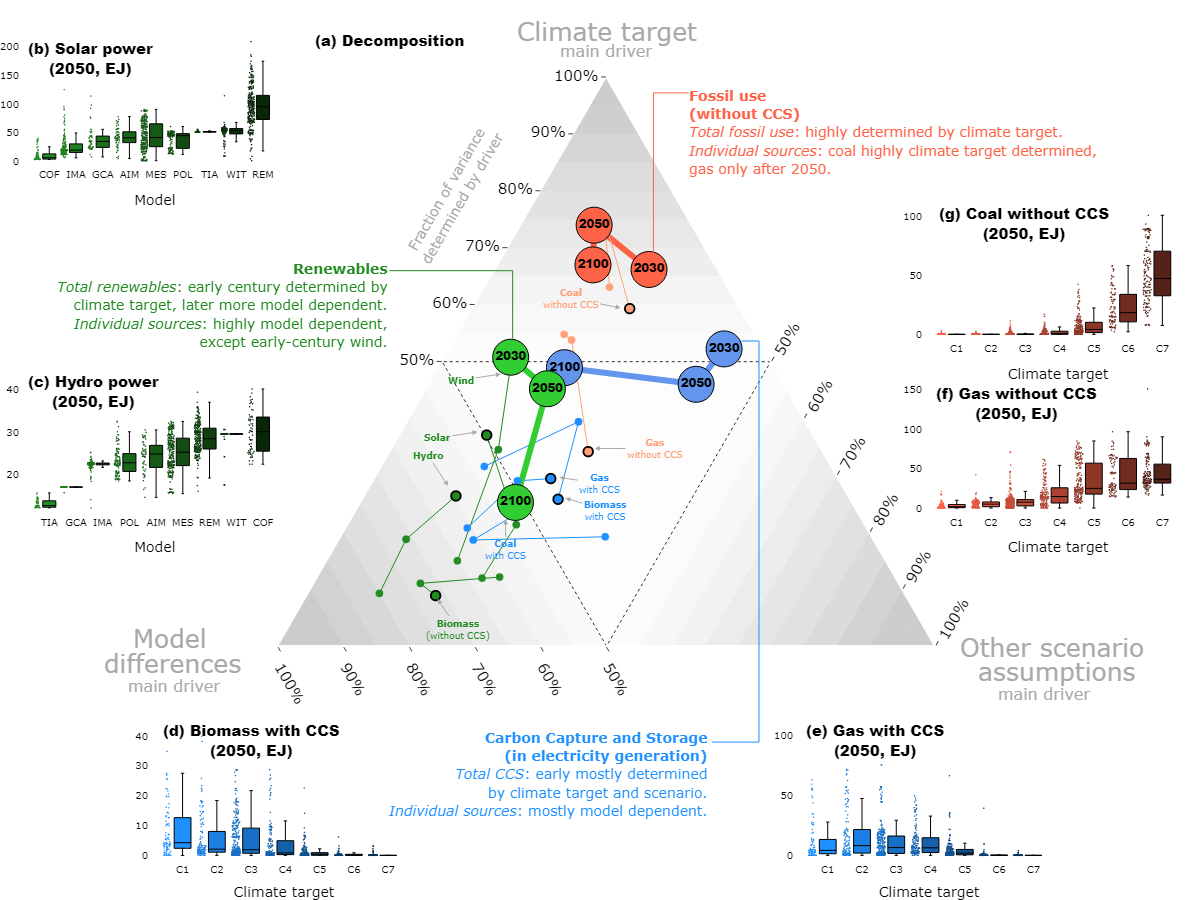

In [82]:
fig = make_subplots(
    rows=5, cols=10,
    horizontal_spacing = 0.10,
    vertical_spacing=0.05,
    specs = [[{"type": "box", 'colspan': 3}, {}, {"type": "scatterternary", "colspan": 6, "rowspan": 4}, {}, {}, {}, {}, {"type": "box", 'colspan': 3}, {}, {}],
             [{"type": "box", 'colspan': 3}, {}, {}, {}, {}, {}, {}, {"type": "box", 'colspan': 3}, {}, {}],
             [{"type": "box", 'colspan': 3}, {}, {}, {}, {}, {}, {}, {"type": "box", 'colspan': 3}, {}, {}],
             [{}, {}, {}, {}, {}, {}, {}, {}, {}, {}],
             [{}, {"type": "box", 'colspan': 3}, {}, {}, {}, {}, {"type": "box", 'colspan': 3}, {}, {}, {}]
            ],
    subplot_titles = ("", "", "",
                      "", "", "",
                      "", "", "",
                      "", "", "",
                      "", "", "",
                      "", "", "",
                      "", "", "",
                      "", "", "",
                      ),
)

# for t_i, t in enumerate([t1, t2, t3, t4]):
#         for i in range(len(t)):
#                 fig.add_trace(t[i], [2, 5, 8, 8][t_i], [3, 3, 1, 2][t_i])


# linshape('tomato', 0.68, 0.86, 0.55, 0.74, 'dot')
# linshape('forestgreen', 0.20, 0.40, 0.42, 0.635, 'dot')#0.32
# linshape('dodgerblue', 0.65, 0.17, 0.59, 0.65, 'dot')

for t_i, t in enumerate([t1a, t1b, t2a, t2b, t3a, t3b]):
        for i in range(len(t)):
                fig.add_trace(t[i], [2, 3, 5, 5, 1, 3][t_i], [8, 8, 2, 7, 1, 1][t_i])

# Lines 50%
fig.add_trace(go.Scatterternary(a=[0.5, 0.5, 0, 0.5], b=[0, 0.5, 0.5, 0], c=[0.5, 0, 0.5, 0.5],
                                                mode='lines',
                                                showlegend=False,
                                                hoverinfo='skip',
                                                marker={'size': 15,
                                                        'color': 'black',
                                                        'opacity': 1,#0.9-i*0.03,
                                                        'line' :dict(width=0., color=cl1)},
                                                line={'width': 1, #np.mean(s[i:i+2])*0.5,
                                                        'color': 'black',
                                                        'dash': 'dot'},
                                                textfont=dict(size=5,
                                                        color='black')), 1, 3)
for n in range(len(conttraces)):
        fig.add_trace(conttraces[n], 1, 3)

for v in range(len(linetraces)):
        fig.add_trace(linetraces[v], 1, 3)
for v in range(len(startraces)):
        fig.add_trace(startraces[v], 1, 3)

fig.update_layout({'margin':dict(l=0,r=7,b=0,t=35),
'plot_bgcolor':'rgb(243, 243, 243)',
'ternary':
{'sum':1,
'bgcolor':'rgba(0,0,0,0)',#'whitesmoke',
    # "paper_bgcolor":'rgba(0,0,0,0)',
    # "plot_bgcolor":'rgba(0,0,0,0)',
'aaxis':{'title': '', 'min': 0, 'titlefont':{'size': 25},#Climate target<br>
        'linewidth':0, 'ticks':'outside',
        'tickmode':'array','tickvals':[0.5, 0.6, 0.7, 0.8, 0.9, 1.0], 'ticktext':['50%', '60%', '70%', '80%', '90%', '100%'], 'tickfont':{'size':15}},
'baxis':{'title': '', 'min': 0, 'titlefont':{'size': 25},# &nbsp; &nbsp; &nbsp;#Model &nbsp; &nbsp;
        'linewidth':2, 'ticks':'outside',
        'tickmode':'array','tickvals':[0.5, 0.6, 0.7, 0.8, 0.9, 1.0], 'ticktext':['50%', '60%', '70%', '80%', '90%', '100%'],'tickangle':60, 'tickfont':{'size':15}},
'caxis':{'title': '', 'min': 0, 'titlefont':{'size': 25},#Other<br>scenario assumptions
        'linewidth':2, 'ticks':'outside',
        'tickmode':'array','tickvals':[0.5, 0.6, 0.7, 0.8, 0.9, 1.0], 'ticktext':['50%', '60%', '70%', '80%', '90%', '100%'],'tickangle':-60, 'tickfont':{'size':15}}}})

# CATEGORY TEXT
args = dict(xref="paper", yref="paper", showarrow=False)
fig.add_annotation(x=0.03,
                align='right',
                y=0.73,
                text='<b>Renewables</b><br><i>Total renewables</i>: early century determined by<br>climate target, later more model dependent.<br><i>Individual sources</i>: highly model dependent,<br>except early-century wind.',
                font=dict(color='forestgreen', size=14), **args)
fig.add_annotation(x=0.92,
                align='left',
                y=0.94,
                text='<b>Fossil use</b><br><b>(without CCS)</b><br><i>Total fossil use</i>: highly determined by climate target.<br><i>Individual sources</i>: coal highly climate target determined,<br>gas only after 2050.',
                font=dict(color='tomato', size=14), **args)
fig.add_annotation(x=0.45,
                align='right',
                y=0.05,
                text='<b>Carbon Capture and Storage</b><br><b>(in electricity generation)</b><br><i>Total CCS</i>: early mostly determined<br>by climate target and scenario.<br><i>Individual sources</i>: mostly model dependent.',
                font=dict(color='dodgerblue', size=14), **args)

# SUBPANEL ANNOTATIONS
args = dict(xref="paper", yref="paper", font=dict(color='black', family='Arial Black', size=15), showarrow=False)
for i in range(7):
    ex = ''
    if i >= 1: ex = "<br>(2050, EJ)"
    fig.add_annotation(text=['(a) Decomposition',
                             '(b) Solar power',
                             '(c) Hydro power',
                             '(d) Biomass with CCS',
                             '(e) Gas with CCS',
                             "(f) Gas without CCS",
                             "(g) Coal without CCS"][i]+ex, x=[0.25, 0.005, 0.005, 0.12, 0.79, 0.92, 0.93][i], y=[1.01, 1, 0.57, 0.12, 0.12, 0.555, 0.80][i], **args)

# ARROWS
for cat_i, cat in enumerate(['Renewables', 'Fossil', 'CCS']):
    args = dict(xref="paper", yref="paper", arrowhead=2, arrowcolor='darkgrey')
    vars = [['<b>Wind</b>', '<b>Solar</b>', "<b>Hydro</b>", "<b>Biomass</b><br>(without CCS)"], ["<b>Coal</b><br>without CCS", "<b>Gas</b><br>without CCS"], ["<b>Coal</b><br>with CCS", "<b>Gas</b><br>with CCS", "<b>Biomass</b><br>with CCS"]][cat_i]
    col = ['forestgreen', 'lightsalmon', 'dodgerblue'][cat_i]
    for v_i, v in enumerate(vars):
        if cat_i == 0:
            x = [0.41, 0.390, 0.365, 0.356][v_i]
            y = [0.59, 0.52, 0.455, 0.318][v_i]
            ay = [0.2, 0.2, -1, 1][v_i]
            ax = [-2, -2, -1, 1][v_i]
        if cat_i == 1:
            x = [0.512, 0.490][v_i]
            y = [0.67, 0.500][v_i]
            ay = [-0.33, 0][v_i]
            ax = [-2.5, 3][v_i]
        if cat_i == 2:
            x = [0.414, 0.460, 0.465][v_i]
            y = [0.414, 0.465, 0.44][v_i]
            ay = [1, 0.2, 0.4][v_i]
            ax = [0, 2, 2][v_i]
        fig.add_annotation(x=x, y=y, ax=ax*20, ay=ay*30, text=v, font=dict(color=col, size=9), **args)

# LINES TO TOTAL TEXTS
args = dict(xref='paper', yref='paper', type="line")
fig.add_shape(x0=0.54, y0=0.73, x1=0.54, y1=0.93, **args, line=dict(color="tomato",width=1))
fig.add_shape(x0=0.57, y0=0.93, x1=0.54, y1=0.93, **args, line=dict(color="tomato",width=1))

fig.add_shape(x0=0.615, y0=0.63, x1=0.63, y1=0.63, **args, line=dict(color="dodgerblue",width=1))
fig.add_shape(x0=0.63, y0=0.63, x1=0.63, y1=0.145, **args, line=dict(color="dodgerblue",width=1))
fig.add_shape(x0=0.59, y0=0.145, x1=0.63, y1=0.145, **args, line=dict(color="dodgerblue",width=1))

fig.add_shape(x0=0.42, y0=0.633, x1=0.42, y1=0.715, **args, line=dict(color="forestgreen",width=1))
fig.add_shape(x0=0.315, y0=0.715, x1=0.42, y1=0.715, **args, line=dict(color="forestgreen",width=1))

# AXIS ANNOTATIONS
args = dict(xref="paper", yref="paper", showarrow=False)
fig.add_annotation(text="Fraction of variance<br>determined by driver", x=0.37, y=0.9, textangle=-60, **args, font=dict(color='darkgray', size=14))

# PLOT WRAPUP
#fig.update_xaxes(row=1, col=1, font_size=5)
fig.update_layout(
    font=dict(
        size=10,
        color="black"
    )
)
fig.update_xaxes(title_text="Model", row=1, col=1, title_font_size=14)
fig.update_xaxes(title_text="Climate target", row=2, col=8, title_font_size=14)
fig.update_xaxes(title_text="Model", row=3, col=1, title_font_size=14)
fig.update_xaxes(title_text="Climate target", row=3, col=8, title_font_size=14)
fig.update_xaxes(title_text="Climate target", row=5, col=2, title_font_size=14)
fig.update_xaxes(title_text="Climate target", row=5, col=7, title_font_size=14)


# TRIANGLE CORNER LABELS
args = dict(xref="paper", yref="paper", showarrow=False)
fig.add_annotation(text="Climate target", x=0.5, y=1.025, **args, font=dict(color='darkgray', size=25))
fig.add_annotation(text="main driver", x=0.5, y=0.995, **args, font=dict(color='darkgray', size=16))
fig.add_annotation(text="Model", x=0.095, y=0.25, **args, font=dict(color='darkgray', size=25))
fig.add_annotation(text="differences", x=0.07, y=0.22, **args, font=dict(color='darkgray', size=25))
fig.add_annotation(text="main driver", x=0.09, y=0.20, **args, font=dict(color='darkgray', size=16))
fig.add_annotation(text="Other scenario", x=0.96, y=0.24, **args, font=dict(color='darkgray', size=25))
fig.add_annotation(text="assumptions", x=0.953, y=0.210, **args, font=dict(color='darkgray', size=25))
fig.add_annotation(text="main driver", x=0.915, y=0.19, **args, font=dict(color='darkgray', size=16))

fig.update_layout(plot_bgcolor='rgba(0,0,0,0)')
fig.update_layout(height=900, width=1200)
fig.show(renderer="png")

## Savings

In [81]:
if save == 1:
    try:
        os.remove('../Figures/Paperfigures/Figure_1'+sub+'.html')
    except:
        3
    def html_w(typ):
        return '<html> '+typ+' <p style="font-family: Arial">'

    fig.write_image("../Figures/Paperfigures/Figure_1"+sub+".pdf")
    fig.write_image("../Figures/Paperfigures/Figure_1"+sub+".png", scale=3)
    fig.write_image("../Figures/Paperfigures/Figure_1"+sub+".svg")
    today = date.today()
    td = today.strftime("%B %d, %Y")

    with open('../Figures/Paperfigures/Figure_1'+sub+'.html', 'a') as f:
        f.write(html_w('<h1>')+'Figure 1 - Electricity Generation</p></h1>')
        f.write(html_w('<body>')+'Version: '+td+'</p></body>')
        f.write(fig.to_html(full_html=False, include_plotlyjs='cdn'))